In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import sklearn
from seaborn.axisgrid import Grid
from sklearn.model_selection import GridSearchCV

In [17]:
from google.colab import files
uploaded = files.upload()

In [33]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [34]:
print('Information of Stroke Dataset')
display(df.head())
print('\n')
print('------------------------------------------------------------------------------------------------------------------------------------------------------')
display(print('The shape of the data:',df.shape))
print('\n')
print('------------------------------------------------------------------------------------------------------------------------------------------------------')
display(df.info())
print('\n')
print('------------------------------------------------------------------------------------------------------------------------------------------------------')
df.isnull().sum()

Information of Stroke Dataset


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1




------------------------------------------------------------------------------------------------------------------------------------------------------
The shape of the data: (5110, 12)


None



------------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


None



------------------------------------------------------------------------------------------------------------------------------------------------------


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [35]:
print('The percentage of null value is:',round(((201/5110)*100),2) ,'%')
df.dropna(inplace=True)
print('Data size after drop na:', df.shape)

The percentage of null value is: 3.93 %
Data size after drop na: (4909, 12)


In [36]:
df.drop('id',axis = 1, inplace = True)

In [37]:
co = df.corr()
co['stroke'].sort_values(ascending = False)

stroke               1.000000
age                  0.232331
hypertension         0.142515
avg_glucose_level    0.138936
heart_disease        0.137938
bmi                  0.042374
Name: stroke, dtype: float64

Test the balance of the dataset
The data is not balance, might affect the results of the machine learning datasets


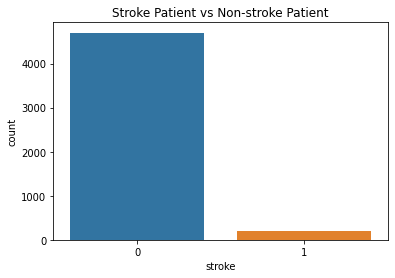

In [38]:
print('Test the balance of the dataset')
sns.countplot(x = df['stroke'])
plt.title('Stroke Patient vs Non-stroke Patient')
print('The data is not balance, might affect the results of the machine learning datasets')

In [39]:
gender_code = {value:key for key,value in enumerate(df['gender'].unique())}
df['gender'] = df['gender'].map(gender_code)

married_code = {value:key for key,value in enumerate(df['ever_married'].unique())}
df['ever_married'] = df['ever_married'].map(married_code)

work_code = {value:key for key,value in enumerate(df['work_type'].unique())}
df['work_type'] = df['work_type'].map(work_code)

residence_code = {value:key for key,value in enumerate(df['Residence_type'].unique())}
df['Residence_type'] = df['Residence_type'].map(residence_code)

smoking_code = {value:key for key,value in enumerate(df['smoking_status'].unique())}
df['smoking_status'] = df['smoking_status'].map(smoking_code)


In [80]:
df.shape

(4909, 11)

In [84]:
X = df.iloc[:,0:10]
y = df['stroke']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [86]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
param_grid = { 'C':[0,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(),param_grid,refit=True, verbose=3)

grid.fit(X_train,y_train)

In [88]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict = grid.predict(X_test)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


In [89]:
svm_cm = confusion_matrix(y_test,y_predict)
print('Confusion MAtrix of the Model')
print(svm_cm)
print('-----------------------------------------------------------------')
print('\n')

svm_acc = accuracy_score(y_test,y_predict)
print('Accuracy Score of the Model')
print(svm_acc)
print('-----------------------------------------------------------------')
print('\n')

svm_class = classification_report(y_test,y_predict)
print('Classification Report of the Model')
print(svm_class)
print('-----------------------------------------------------------------')
print('\n')


Confusion MAtrix of the Model
[[931   0]
 [ 51   0]]
-----------------------------------------------------------------


Accuracy Score of the Model
0.9480651731160896
-----------------------------------------------------------------


Classification Report of the Model
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       931
           1       0.00      0.00      0.00        51

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.90      0.95      0.92       982

-----------------------------------------------------------------




/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
XGB = XGBClassifier(random_state = 1)
XGB.fit(X_train, y_train)

XGB.predict(X_test)


In [91]:
xgb_cm = confusion_matrix(y_test,y_predict)
print('Confusion MAtrix of the Model')
print(xgb_cm)
print('-----------------------------------------------------------------')
print('\n')

xgb_acc = accuracy_score(y_test,y_predict)
print('Accuracy Score of the Model')
print(xgb_acc)
print('-----------------------------------------------------------------')
print('\n')

xgb_class = classification_report(y_test,y_predict)
print('Classification Report of the Model')
print(xgb_class)
print('-----------------------------------------------------------------')
print('\n')

Confusion MAtrix of the Model
[[931   0]
 [ 51   0]]
-----------------------------------------------------------------


Accuracy Score of the Model
0.9480651731160896
-----------------------------------------------------------------


Classification Report of the Model
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       931
           1       0.00      0.00      0.00        51

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.90      0.95      0.92       982

-----------------------------------------------------------------




/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Altough accuracy for both SVM and xGBoost give high accuracy higher than 90% but none of the moedel able to detect True Positive (TP), and there is high level of False Negative (FN) ')

#Balance Dataset

In [41]:
X = df.iloc[:,0:10]
y = df['stroke']

In [42]:
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(X,y)


In [43]:
ddf=x_resampled
ddf['stroke']=y_resampled

In [45]:
ddf.shape

(9400, 11)

The number of stroke and non stroke patient are stable now




/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


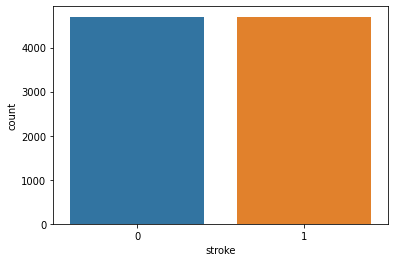

In [49]:
sns.countplot(ddf['stroke'])
print('The number of stroke and non stroke patient are stable now')
print('\n')

In [53]:
X = ddf.iloc[:,0:10]
y = ddf['stroke']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [74]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#Support Vector Machine 
param_grid = { 'C':[0,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(),param_grid,refit=True, verbose=3)

grid.fit(X_train,y_train)

In [66]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict = grid.predict(X_test)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [77]:
svm_cm = confusion_matrix(y_test,y_predict)
print('Confusion MAtrix of the Model')
print(svm_cm)
print('-----------------------------------------------------------------')
print('\n')

svm_acc = accuracy_score(y_test,y_predict)
print('Accuracy Score of the Model')
print(svm_acc)
print('-----------------------------------------------------------------')
print('\n')

svm_class = classification_report(y_test,y_predict)
print('Classification Report of the Model')
print(svm_class)
print('-----------------------------------------------------------------')
print('\n')


Confusion MAtrix of the Model
[[934   0]
 [  0 946]]
-----------------------------------------------------------------


Accuracy Score of the Model
1.0
-----------------------------------------------------------------


Classification Report of the Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       934
           1       1.00      1.00      1.00       946

    accuracy                           1.00      1880
   macro avg       1.00      1.00      1.00      1880
weighted avg       1.00      1.00      1.00      1880

-----------------------------------------------------------------




In [78]:
from xgboost import XGBClassifier

XGB = XGBClassifier(random_state = 1)
XGB.fit(X_train, y_train)

XGB.predict(X_test)


array([0, 1, 1, ..., 1, 0, 1])

In [79]:
xgb_cm = confusion_matrix(y_test,y_predict)
print('Confusion MAtrix of the Model')
print(xgb_cm)
print('-----------------------------------------------------------------')
print('\n')

xgb_acc = accuracy_score(y_test,y_predict)
print('Accuracy Score of the Model')
print(xgb_acc)
print('-----------------------------------------------------------------')
print('\n')

xgb_class = classification_report(y_test,y_predict)
print('Classification Report of the Model')
print(xgb_class)
print('-----------------------------------------------------------------')
print('\n')

Confusion MAtrix of the Model
[[934   0]
 [  0 946]]
-----------------------------------------------------------------


Accuracy Score of the Model
1.0
-----------------------------------------------------------------


Classification Report of the Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       934
           1       1.00      1.00      1.00       946

    accuracy                           1.00      1880
   macro avg       1.00      1.00      1.00      1880
weighted avg       1.00      1.00      1.00      1880

-----------------------------------------------------------------




In [93]:
print('SVM with the C:1, gamma:1 and rbf kernel produce a model with 100% accuracy. Same accuracy able to obtain on xGBoost model')
print('\n')
print('Balance data is important on building a data')

SVM with the C:1, gamma:1 and rbf kernel produce a model with 100% accuracy. Same accuracy able to obtain on xGBoost model


Balance data is important on building a data
